In [1]:
ls -lah ../data

total 92M
drwxrwxr-x 2 ilya ilya 4.0K Sep 23 15:58 ./
drwxrwxr-x 5 ilya ilya 4.0K Sep 16 13:23 ../
-rw-rw-r-- 1 ilya ilya  91M Sep 16 09:02 BJ-HSR1.pe.fastq.gz
-rw-rw-r-- 1 ilya ilya 500K Sep 16 09:03 contigs.fasta
-rw-r----- 1 ilya ilya  644 Sep 16 09:00 dHSR1.fa
-rw-rw-r-- 1 ilya ilya 5.4K Sep 23 15:58 gradtimes.txt
-rw-rw-r-- 1 ilya ilya  445 Sep 16 09:00 hHSR-435.fa
-rw-rw-r-- 1 ilya ilya  611 Sep 16 09:00 hHSR.fa
-rw-rw-r-- 1 ilya ilya  126 Sep 16 09:04 rose.fa


In [1]:
import csv
import pandas as pd

In [2]:
from __future__ import print_function

In [3]:
results = []
with open('../data/gradtimes.txt', 'r') as fi:
    reader = csv.DictReader(fi, fieldnames=['program', 'grad_time'], delimiter='\t')
    for rec in reader:
        results.append(rec)
        
print(len(results))

525


In [4]:
df = pd.DataFrame.from_records(results)
df['grad_time'] = df['grad_time'].map(float)

In [5]:
df

,grad_time,program
0,7.59,NEURO
1,5.92,MICRO
2,9.01,MICRO
3,5.17,CMB
4,4.17,CMB
5,4.83,DG
6,3.08,CMB
7,7.42,CMB
8,6.59,NEURO
9,7.50,PHARM


In [6]:
df.describe()

,grad_time
count,525.000000
mean,5.428076
std,1.657043
min,1.670000
25%,4.580000
50%,5.250000
75%,6.010000
max,17.430000


In [7]:
df[df['program'] == 'NEURO'].describe()

,grad_time
count,84.000000
mean,5.932738
std,1.750239
min,3.580000
25%,4.980000
50%,5.670000
75%,6.670000
max,16.760000


In [8]:
df[df['program'] <> 'NEURO'].describe()

,grad_time
count,441.000000
mean,5.331950
std,1.623037
min,1.670000
25%,4.420000
50%,5.250000
75%,5.920000
max,17.430000


In [9]:
df[df['program'] == 'MBP-GPP'].describe()

,grad_time
count,7.000000
mean,5.168571
std,1.134481
min,3.670000
25%,4.420000
50%,4.920000
75%,6.000000
max,6.750000


In [10]:
set(df['program'])

{'BIOMEDICAL',
 'CMB',
 'COB',
 'DG',
 'IMMUNOLOGY',
 'MBP',
 'MBP-GPP',
 'MICRO',
 'MOTI',
 'NEURO',
 'PATHOBIOLOGY',
 'PHARM',
 'STEM'}

In [11]:
from ggplot import *

In [12]:
%matplotlib inline

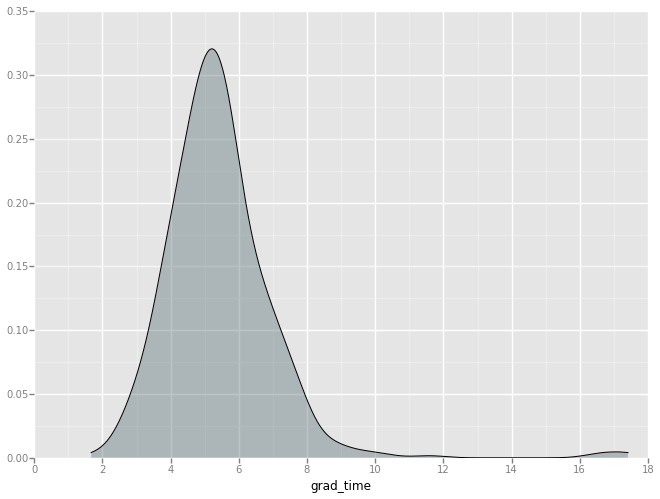

<ggplot: (8765787373389)>


In [13]:
g = ggplot(aes(x='grad_time'), data=df) \
    + geom_density(fill='#586e75', alpha=0.4)

print(g)

In [14]:
import random

In [29]:
hits = []
nndf = df[df['program'] <> 'NEURO'].copy()
for i in range(100000):
    mean = nndf.sample(n=84)['grad_time'].mean()
    if mean >= 5.9327:
        hits.append(mean)

In [30]:
len(hits)

19